In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
df = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-d-martynov/lesson_1_DM/WORK_FILES/transaction_data.csv')

In [15]:
df['date'] = pd.to_datetime(transaction.date)

In [27]:
df.dtypes

date           object
name           object
transaction    object
dtype: object

In [59]:
df.isna().sum()

date           0
name           0
transaction    0
dtype: int64

In [60]:
df.head()

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled


In [121]:
ay = df.transaction.unique()

In [124]:
ax

transaction
successfull    3692
cancelled      1619
error             4
dtype: int64

In [113]:
ax = df.value_counts('transaction')

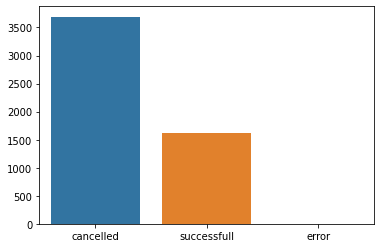

In [128]:
sns.barplot(x=df.transaction.unique(), y=df.value_counts('transaction'))

In [135]:
df.query('transaction == "successfull"')

,date,name,transaction
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
6,2020-03-02 00:54:12,Olga_Lesnova,successfull
7,2020-03-02 00:18:43,Irina_Lesnova,successfull
8,2020-03-02 00:06:10,Vasilisa_Petrova,successfull
...,...,...,...
5309,2020-03-02 01:26:13,Olga_Ozerova,successfull
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull


In [145]:
df.query('transaction == "successfull"').groupby('name').agg({'transaction':'count'}).sort_values('transaction',ascending=False)

,transaction
name,
Svetlana_Smirnova,82
Olga_Smirnova,80
Masha_Ozerova,80
Svetlana_Ivanova,79
Svetlana_Polyanova,78
Masha_Polyanova,78
Ekaterina_Smirnova,77
Lolita_Ivanova,76
Irina_Lesnova,76


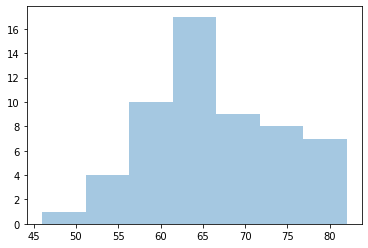

In [153]:
sns.distplot(df.query('transaction == "successfull"').groupby('name').agg({'transaction':'count'}).sort_values('transaction',ascending=False),kde=False)

In [151]:
df.query('transaction == "successfull"').groupby('name').agg({'transaction':'count'}).sort_values('transaction',ascending=False).describe()

,transaction
count,56.000000
mean,65.928571
std,7.787769
min,46.000000
25%,61.000000
50%,64.000000
75%,72.000000
max,82.000000


In [202]:
change_df = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-d-martynov/lesson_1_DM/WORK_FILES/transaction_data_updated (1).csv',parse_dates=['date'])

In [193]:
change_df.head()

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17


In [194]:
change_df.dtypes

date           datetime64[ns]
name                   object
transaction            object
minute                  int64
dtype: object

In [188]:
change_pivot = change_df.groupby(['minute','name'],as_index=False).agg(count_transact=('transaction','count'))

In [189]:
change_pivot

,minute,name,count_transact
0,0,Ekaterina_Fedorova,3
1,0,Ekaterina_Ivanova,4
2,0,Ekaterina_Lesnova,2
3,0,Ekaterina_Ozerova,3
4,0,Ekaterina_Petrova,4
...,...,...,...
2573,59,Vasilisa_Fedorova,2
2574,59,Vasilisa_Ivanova,1
2575,59,Vasilisa_Lesnova,2
2576,59,Vasilisa_Ozerova,2


In [200]:
user_vs_minute_pivot = change_pivot.pivot(index='minute', columns='name', values='count_transact').reset_index().fillna(0)

In [201]:
user_vs_minute_pivot

name,minute,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
0,0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,...,0.0,3.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,1.0
1,1,4.0,4.0,0.0,4.0,2.0,5.0,4.0,4.0,4.0,...,4.0,5.0,3.0,2.0,3.0,3.0,0.0,0.0,3.0,2.0
2,2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,...,4.0,1.0,3.0,3.0,0.0,1.0,2.0,1.0,3.0,1.0
3,3,3.0,0.0,2.0,0.0,5.0,2.0,1.0,3.0,2.0,...,1.0,5.0,5.0,2.0,4.0,0.0,3.0,4.0,1.0,0.0
4,4,3.0,0.0,0.0,3.0,1.0,1.0,2.0,3.0,2.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,0.0,1.0
5,5,3.0,0.0,2.0,3.0,1.0,0.0,5.0,3.0,1.0,...,0.0,2.0,3.0,1.0,0.0,0.0,3.0,0.0,2.0,1.0
6,6,4.0,1.0,2.0,2.0,0.0,4.0,5.0,2.0,2.0,...,2.0,1.0,4.0,1.0,2.0,4.0,1.0,2.0,0.0,2.0
7,7,3.0,2.0,1.0,2.0,2.0,3.0,4.0,1.0,1.0,...,3.0,1.0,1.0,2.0,4.0,1.0,0.0,1.0,2.0,2.0
8,8,2.0,4.0,3.0,1.0,0.0,3.0,2.0,1.0,1.0,...,0.0,1.0,0.0,1.0,2.0,4.0,2.0,1.0,1.0,1.0
9,9,2.0,4.0,2.0,3.0,4.0,0.0,3.0,2.0,2.0,...,2.0,3.0,1.0,2.0,4.0,2.0,3.0,0.0,1.0,4.0


In [209]:
change_df

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17
...,...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull,9
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull,46
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull,16
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull,13


In [223]:
change_df['true_minute'] = change_df['date'].dt.minute + change_df['date'].dt.hour * 60

In [224]:
change_df

,date,name,transaction,minute,true_minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6,66
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17,17
...,...,...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull,9,9
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull,46,46
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull,16,16
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull,13,13
